In [20]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
# import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Loading California Housing Data

In [3]:
file_path = "/home/loyd/ML_Python/housing.csv"

In [4]:
data = pd.read_csv(file_path)

In [5]:
data.columns  # look at the columns inside the dataset

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.head(10)  # Gives back the first 10 results in te dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

MISSING DATA ANALYSIS


In [10]:
#check for missing values
missing_values = data.isnull().sum()

# Calculate the Percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data
print("Missing Value in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Value in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [11]:
# Remove rows with missing values

data_cleaned = data.dropna()

# Verify that missing values have been removed

print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


DATA EXPLORATION AND VISUALIZATION

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Matplotlib is building the font cache; this may take a moment.


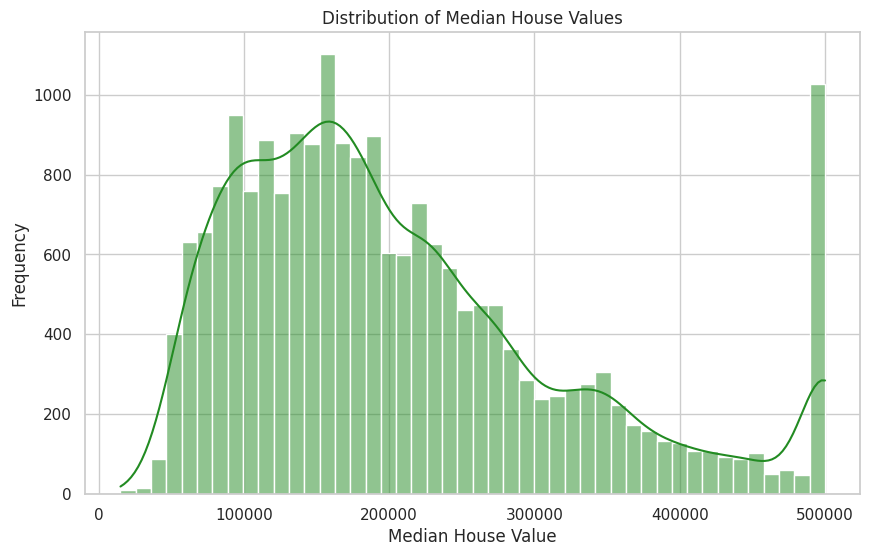

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Using Interquartile Range to remove Outliers

In [22]:
# Assuing data is yourDataFrame and median_house_value is the column of interest

Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)

# InterQuartile Range

IQR = Q3 - Q1

# Define the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape: ", data_cleaned.shape)
print("New data shape without outliers: ", data_no_outliers_1.shape)


119500.0
264700.0
Original data shape:  (20433, 10)
New data shape without outliers:  (19369, 10)


BoxPlot for Outlier detection

Outlier in Median Income

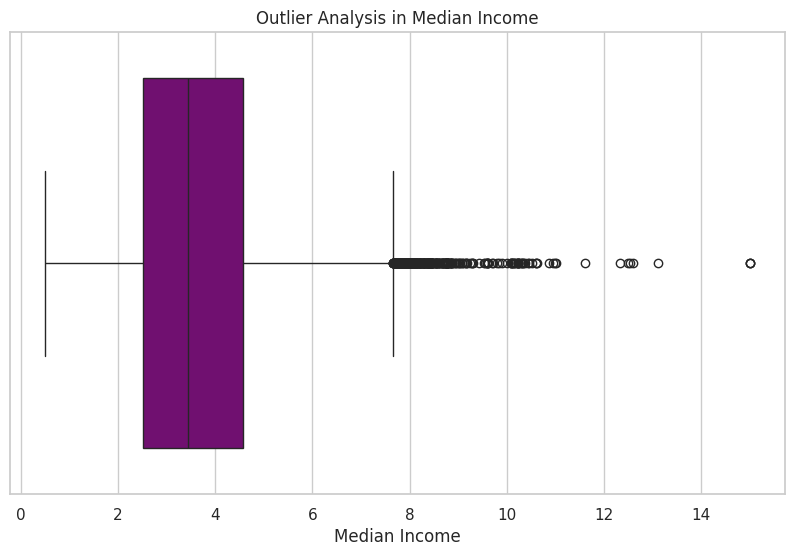

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [26]:
Q1 = data_no_outliers_1["median_income"].quantile(0.25)
print(Q1)
Q3 = data_no_outliers_1["median_income"].quantile(0.75)
print(Q3)

# InterQuartile Range

IQR = Q3 - Q1

# Get the bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1["median_income"] >= lower_bound) & (data_no_outliers_1["median_income"] <= upper_bound)]

# Check the shape of the data before and after removal of outliers

print("Original data shape: ", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

2.5223
4.5724
Original data shape:  (19369, 10)
Data shape without outliers: (19026, 10)


In [28]:
data = data_no_outliers_2

Correlation HeatMap

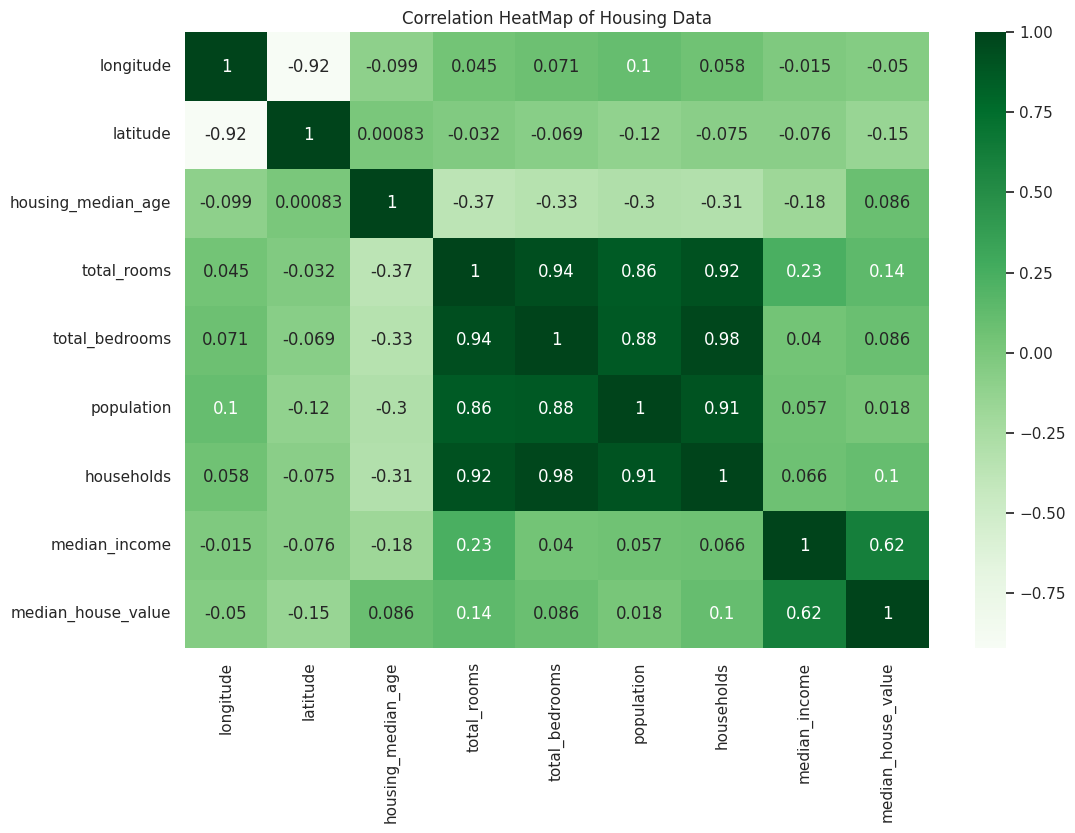

In [32]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Greens")
plt.title("Correlation HeatMap of Housing Data")
plt.show()